In [1]:
# importing Dependant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
(df==0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking Unique Values

In [7]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [8]:
df["Glucose"].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [9]:
df["BloodPressure"].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [10]:
df["SkinThickness"].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [11]:
df["BMI"].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [12]:
df["DiabetesPedigreeFunction"].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [13]:
df["Insulin"].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [14]:
df["Age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [15]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Data Visualization

Data Distribution


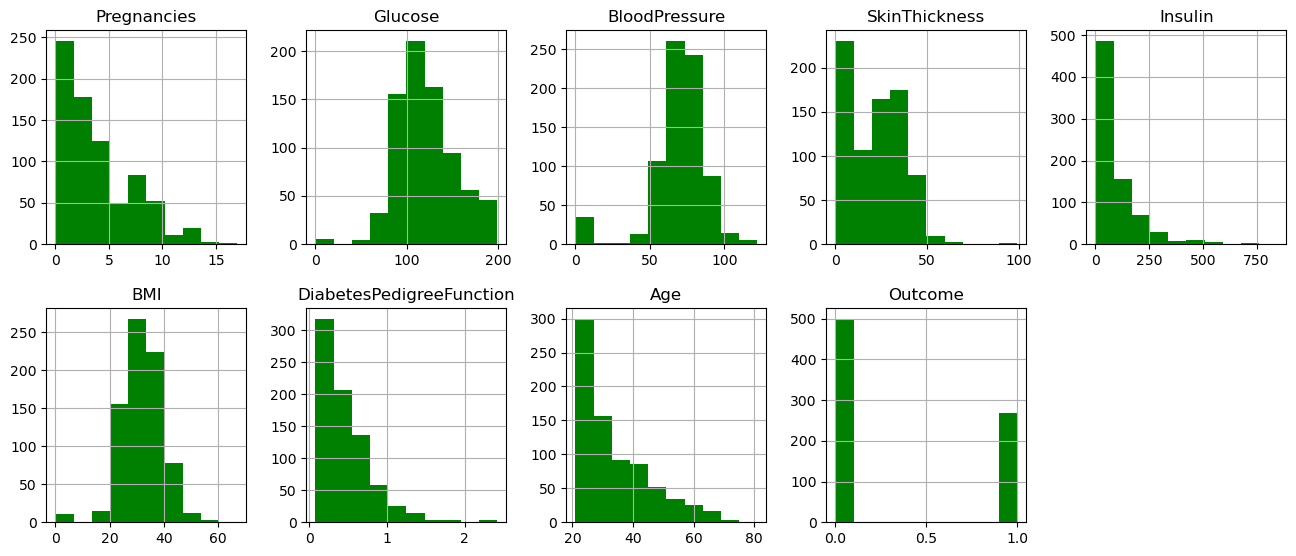

In [16]:
df.hist(layout = (3,5), figsize=(16,10), color = "g")
print('Data Distribution')
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

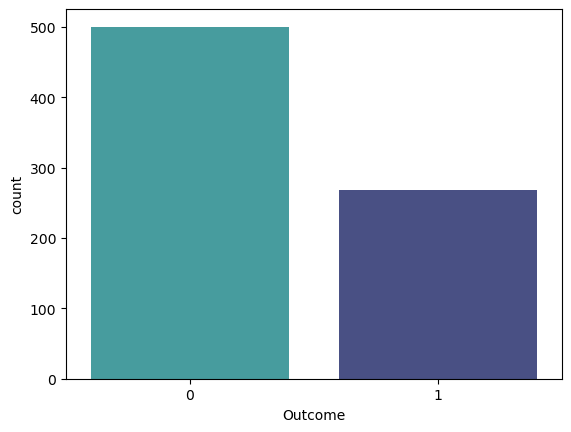

In [17]:
sns.countplot(x="Outcome", data=df, palette="mako_r")

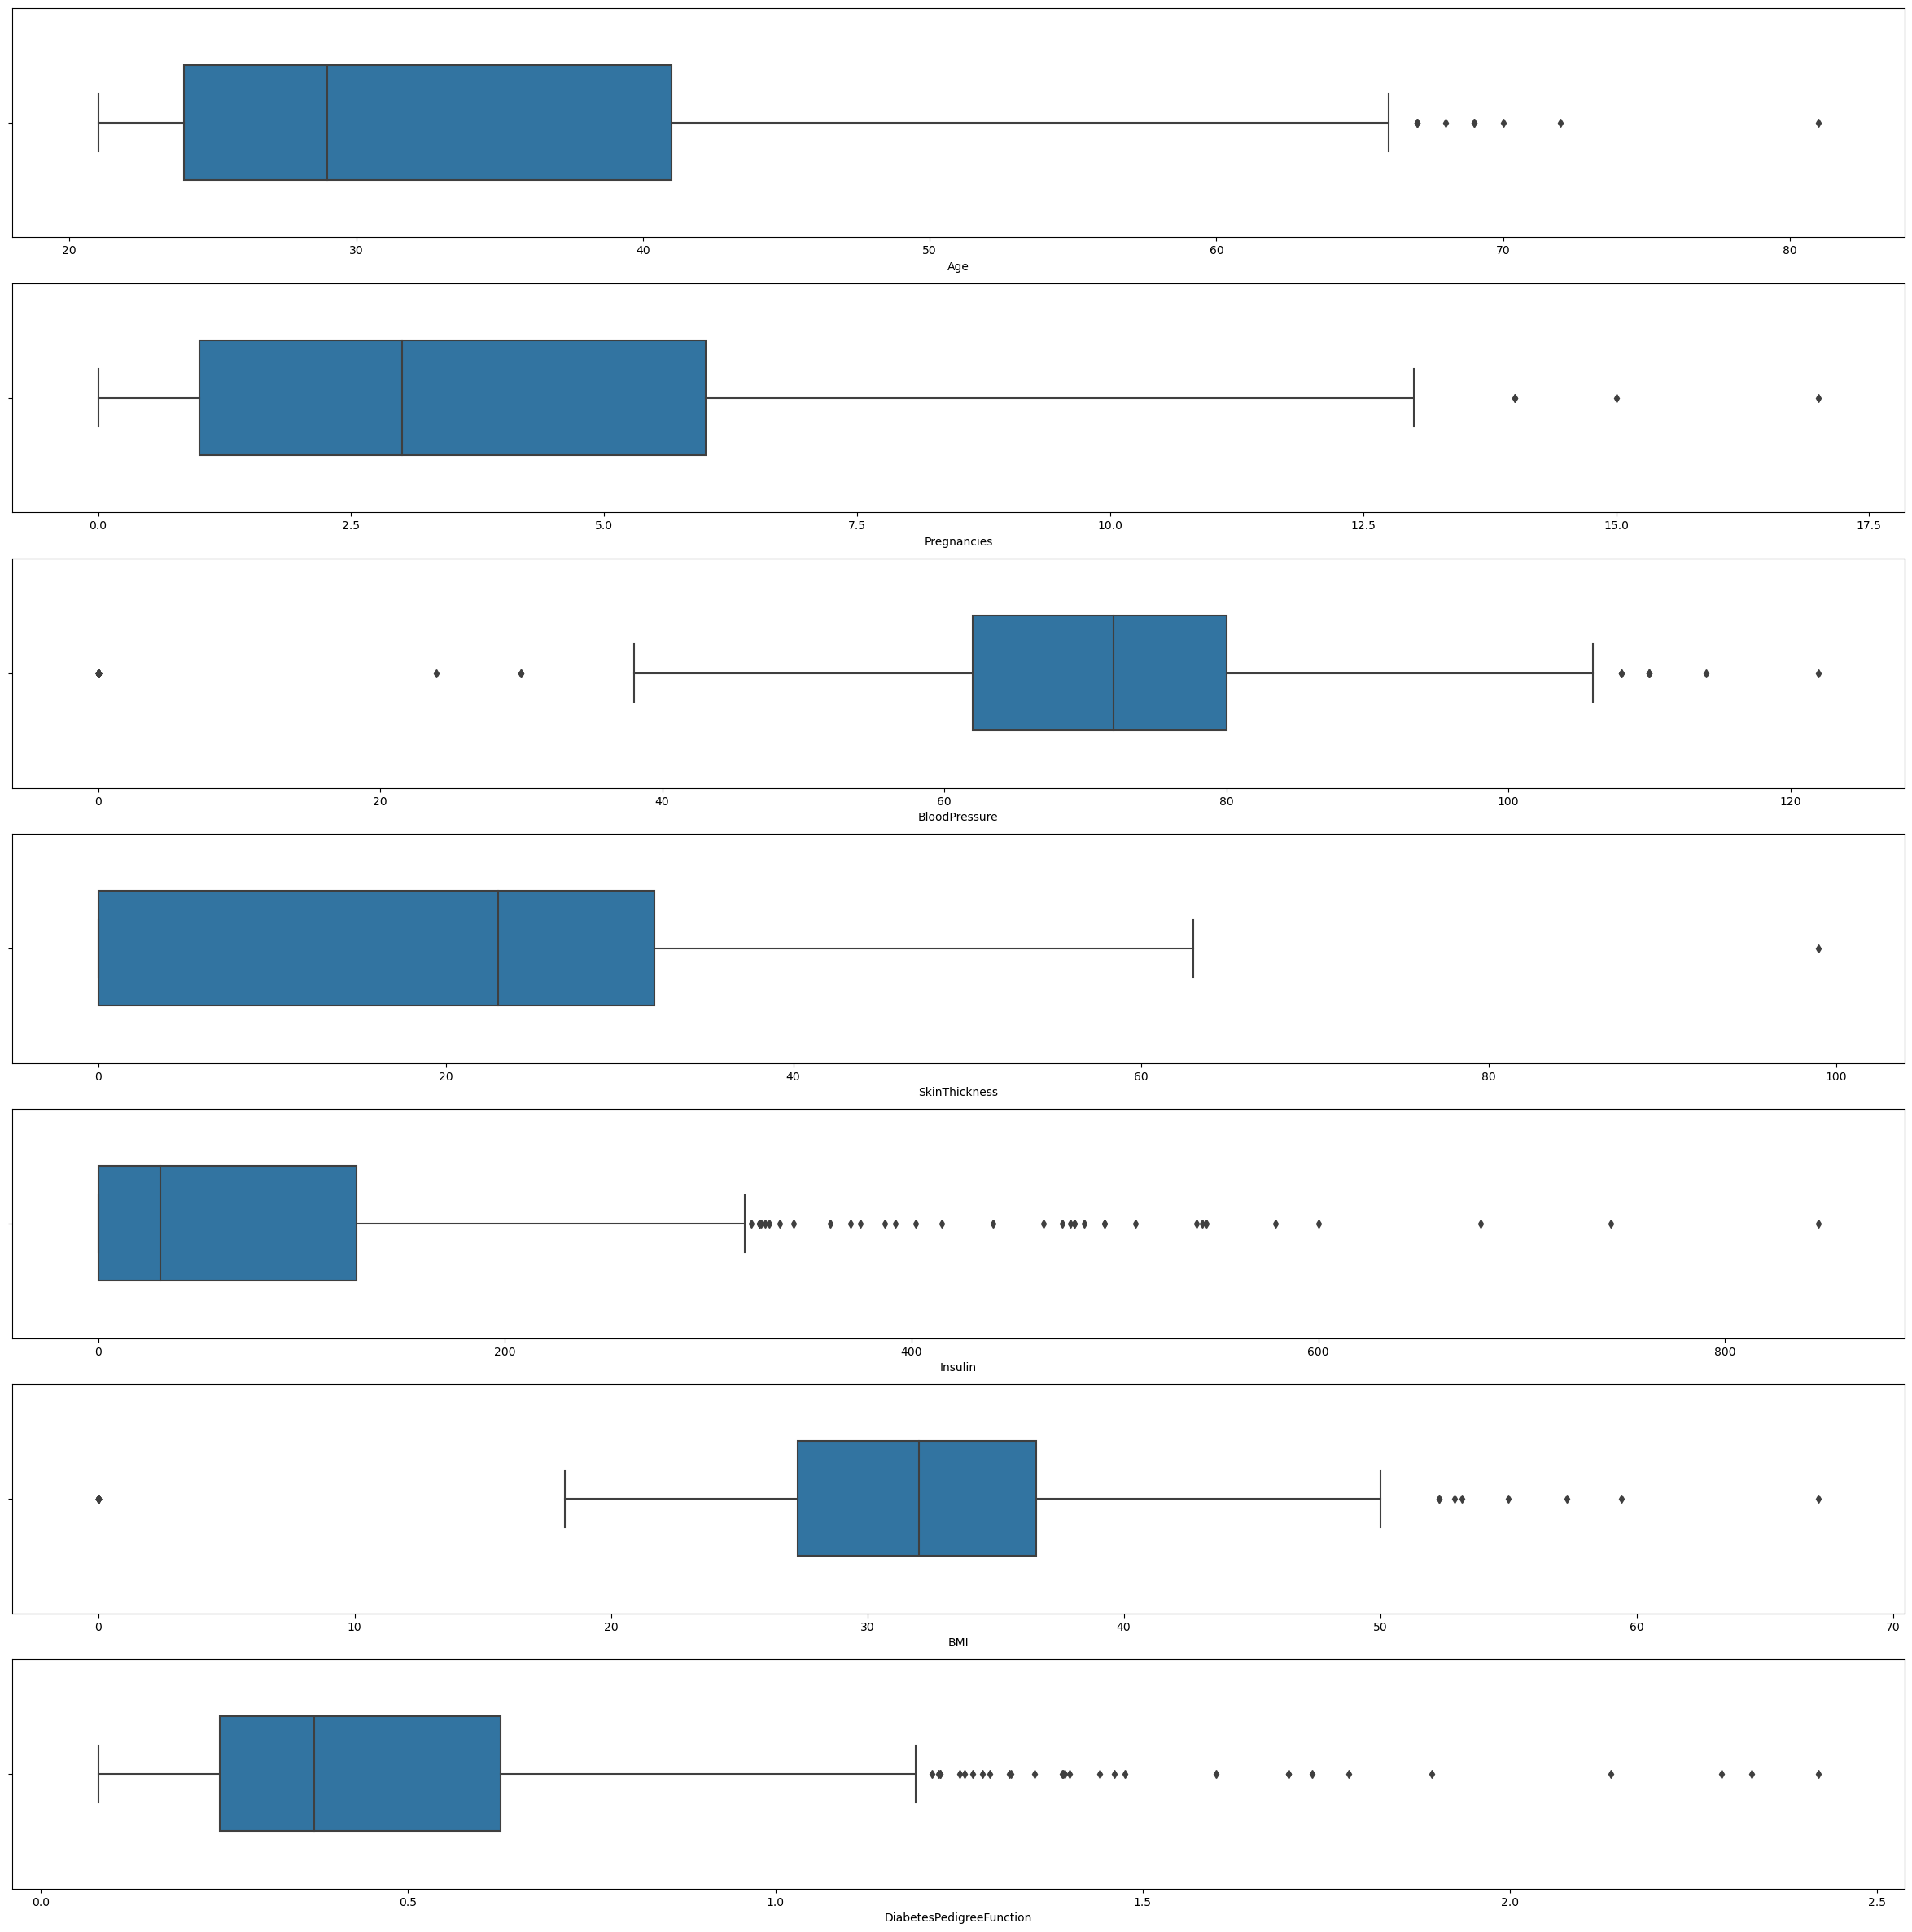

In [18]:
fig, axs =plt.subplots(7, figsize=(30,30))
plot1 = sns.boxplot(x=df["Age"], ax=axs[0], width=0.5)
plot2 = sns.boxplot(x=df["Pregnancies"], ax=axs[1], width=0.5)
plot3 = sns.boxplot(x=df["BloodPressure"], ax=axs[2], width=0.5)
plot4 = sns.boxplot(x=df["SkinThickness"], ax=axs[3], width=0.5)
plot5 = sns.boxplot(x=df["Insulin"], ax=axs[4], width=0.5)
plot6 = sns.boxplot(x=df["BMI"], ax=axs[5], width=0.5)
plot7 = sns.boxplot(x=df["DiabetesPedigreeFunction"], ax=axs[6], width=0.5)
plt.savefig("Box Plots2.png", dpi=500)
plt.show()

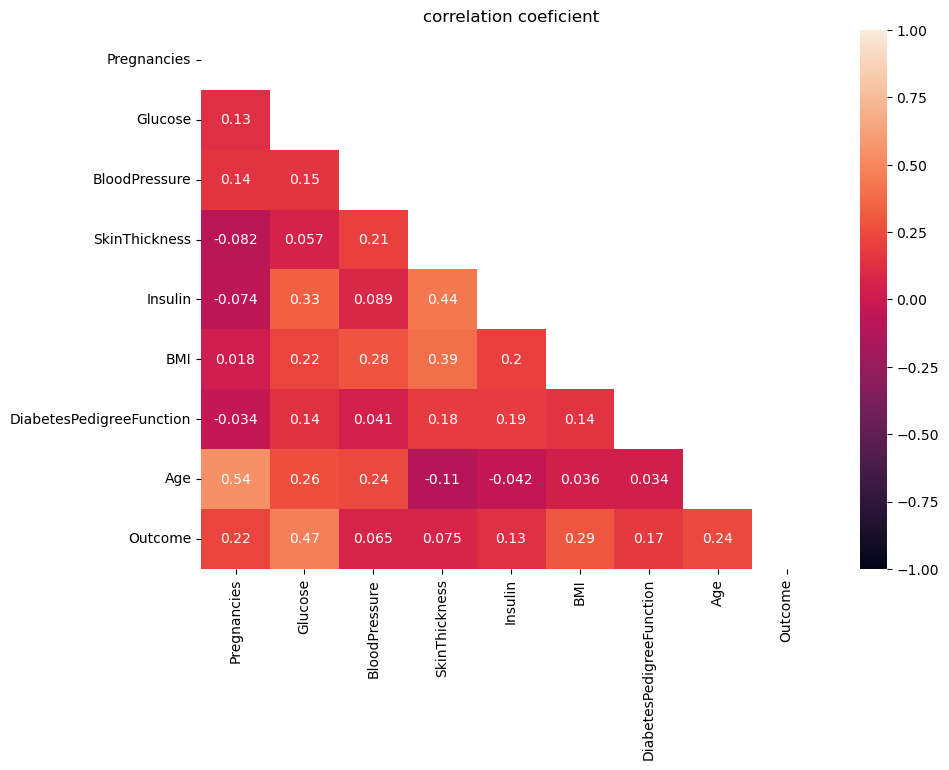

In [19]:
# HEATMAP
# set figure size
plt.figure(figsize=(10,7))

# generate mask to show only the bottom triangle
mask=np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(),annot= True, mask=mask, vmin=-1, vmax=1)
plt. title("correlation coeficient")
plt.savefig("Heatmap.png", dpi=200)
plt.show()

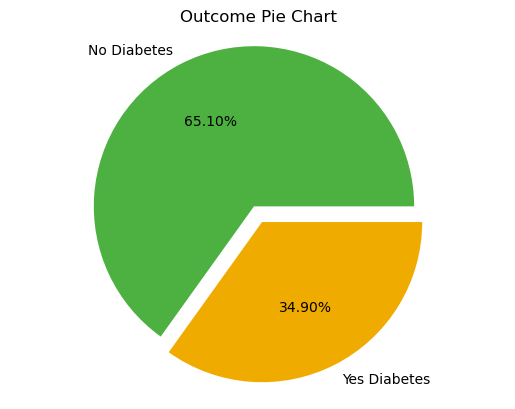

In [20]:
# PIE CHART
outcome=[0,1]
counts=[500,268]
plt.pie(counts, labels=["No Diabetes", "Yes Diabetes"], autopct="%1.2f%%", colors=["#4CB140","#F0AB00"], explode=[0.09,0.02])
plt.title("Outcome Pie Chart")
plt.axis("equal")
plt.savefig("Pie chart 2.png", dpi=100)
plt.show()

## Model Training

In [21]:
x=df.drop("Outcome", axis=1)

y=df.Outcome

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, stratify=y, random_state=42)

In [23]:
logreg=LogisticRegression(max_iter=2000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [24]:
y_pred_test=logreg.predict(x_test)
y_pred_train=logreg.predict(x_train)

In [25]:
# generate prediction in the form of Probability
y_preda= logreg.predict_proba(x_test)
y_preda

array([[0.56518318, 0.43481682],
       [0.66068053, 0.33931947],
       [0.90098635, 0.09901365],
       [0.54816637, 0.45183363],
       [0.19311764, 0.80688236],
       [0.81816031, 0.18183969],
       [0.65768849, 0.34231151],
       [0.97952072, 0.02047928],
       [0.36563756, 0.63436244],
       [0.96177339, 0.03822661],
       [0.76913107, 0.23086893],
       [0.26351128, 0.73648872],
       [0.73146063, 0.26853937],
       [0.89512645, 0.10487355],
       [0.45914919, 0.54085081],
       [0.06034218, 0.93965782],
       [0.34155545, 0.65844455],
       [0.90193354, 0.09806646],
       [0.96981753, 0.03018247],
       [0.73889446, 0.26110554],
       [0.92160227, 0.07839773],
       [0.84058844, 0.15941156],
       [0.90007592, 0.09992408],
       [0.20893641, 0.79106359],
       [0.11214328, 0.88785672],
       [0.18453329, 0.81546671],
       [0.8804626 , 0.1195374 ],
       [0.93043886, 0.06956114],
       [0.09418924, 0.90581076],
       [0.22658924, 0.77341076],
       [0.

In [26]:
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[105  20]
 [ 32  35]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192



In [27]:
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[336  39]
 [ 81 120]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       375
           1       0.75      0.60      0.67       201

    accuracy                           0.79       576
   macro avg       0.78      0.75      0.76       576
weighted avg       0.79      0.79      0.79       576



In [28]:
logreg.coef_[0]

array([ 1.32026627e-01,  3.56555376e-02, -1.13646767e-02, -3.36046385e-04,
       -7.86834214e-04,  9.46925890e-02,  6.57649955e-01,  1.28403406e-02])

In [29]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [30]:
pd.DataFrame(logreg.coef_[0], index=x.columns)

,0
Pregnancies,0.132027
Glucose,0.035656
BloodPressure,-0.011365
SkinThickness,-0.000336
Insulin,-0.000787
BMI,0.094693
DiabetesPedigreeFunction,0.657650
Age,0.012840


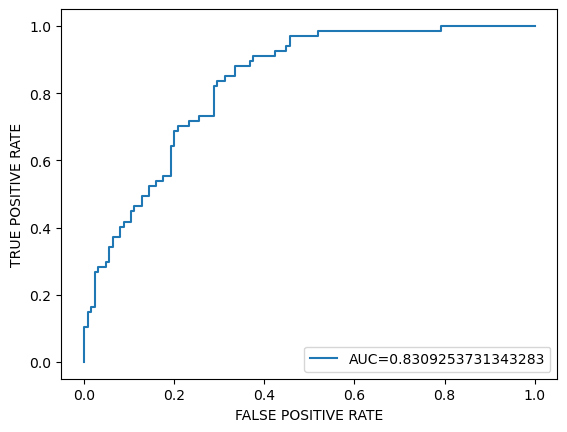

In [31]:
# ploting ROC Curve
y_pred_proba=logreg.predict_proba(x_test)[:,1]
# defing RUC Curve
fpr, tpr,threshu=roc_curve(y_test, y_pred_proba)
# area under the curve
auc=roc_auc_score(y_test, y_pred_proba)

# Creating ROC Curve
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel("TRUE POSITIVE RATE")
plt.xlabel("FALSE POSITIVE RATE")
plt.legend(loc=4)
plt.savefig("ROC Curve.png", dpi=200)
plt.show()

## KKN Algorithm

In [32]:
# apllying Standard Scaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True)
sampled_scaled=scaler.fit_transform(x)

In [33]:
# PCA implemantation
model=PCA(n_components=8)
xs=model.fit_transform(sampled_scaled)
print(np.round(model.explained_variance_ratio_*100,1))

[26.2 21.6 12.9 10.9  9.5  8.5  5.2  5.1]


In [34]:
# spliting train and test data
x_trainn,x_testt, y_trainn, y_testt=train_test_split(xs, y, test_size=0.3, random_state=42)

In [35]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_trainn, y_trainn)

KNeighborsClassifier(n_neighbors=8)

In [36]:
y_pred_testt_knn=knn.predict(x_testt)
y_pred_trainn_knn=knn.predict(x_trainn)

In [37]:
print(confusion_matrix(y_testt, y_pred_testt_knn))
print(classification_report(y_testt, y_pred_testt_knn))

[[124  27]
 [ 46  34]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       151
           1       0.56      0.42      0.48        80

    accuracy                           0.68       231
   macro avg       0.64      0.62      0.63       231
weighted avg       0.67      0.68      0.67       231



In [38]:
print(confusion_matrix(y_trainn, y_pred_trainn_knn))
print(classification_report(y_trainn, y_pred_trainn_knn))

[[330  19]
 [ 80 108]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       349
           1       0.85      0.57      0.69       188

    accuracy                           0.82       537
   macro avg       0.83      0.76      0.78       537
weighted avg       0.82      0.82      0.81       537



In [39]:
# Hyperparametr tunning using Gridsearch CV
rcv=RepeatedKFold(n_splits=10,n_repeats=5)
params={"n_neighbors":range(1,50),"weights":["uniform","distance"]}
grids=GridSearchCV(KNeighborsClassifier(),params, cv=rcv)
grids.fit(x_trainn, y_trainn)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [40]:
grids.best_params_

{'n_neighbors': 32, 'weights': 'distance'}

In [41]:
y_pred_testt_knn_grids=grids.predict(x_testt)
y_pred_trainn_knn_grids=grids.predict(x_trainn)

In [42]:
print(confusion_matrix(y_testt, y_pred_testt_knn_grids))
print(classification_report(y_testt, y_pred_testt_knn_grids))

[[130  21]
 [ 41  39]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       151
           1       0.65      0.49      0.56        80

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



In [43]:
print(confusion_matrix(y_trainn, y_pred_trainn_knn_grids))
print(classification_report(y_trainn, y_pred_trainn_knn_grids))

[[349   0]
 [  0 188]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



## CART Model

In [44]:
clf_df=DecisionTreeClassifier(random_state=42)
clf_df=clf_df.fit(x_train,y_train)

In [45]:
y_pred_test_clf_df=clf_df.predict(x_test)
y_pred_train_clf_df=clf_df.predict(x_train)

In [46]:
print(confusion_matrix(y_test, y_pred_test_clf_df))
print(classification_report(y_test, y_pred_test_clf_df))

[[106  19]
 [ 30  37]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.66      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



In [47]:
print(confusion_matrix(y_train, y_pred_train_clf_df))
print(classification_report(y_train, y_pred_train_clf_df))

[[375   0]
 [  0 201]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       201

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [48]:
# Hyperparameter tuning
params11={
    "max_depth":range(1,5),
    "min_samples_leaf":range(1,5),
    "min_samples_split":range(1,5)
}
rcv=RepeatedKFold(n_splits=10, n_repeats=5)

In [49]:
grids_cart=GridSearchCV(estimator=clf_df, param_grid=params11, cv=rcv, scoring="accuracy")
grids_cart.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             scoring='accuracy')

In [50]:
y_pred_test_grids_cart=grids_cart.predict(x_test)
y_pred_train_grids_cart=grids_cart.predict(x_train)

In [51]:
print(confusion_matrix(y_test, y_pred_test_grids_cart))
print(classification_report(y_test, y_pred_test_grids_cart))

[[105  20]
 [ 35  32]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       125
           1       0.62      0.48      0.54        67

    accuracy                           0.71       192
   macro avg       0.68      0.66      0.67       192
weighted avg       0.70      0.71      0.70       192



In [52]:
print(confusion_matrix(y_train, y_pred_train_grids_cart))
print(classification_report(y_train, y_pred_train_grids_cart))

[[339  36]
 [ 83 118]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       375
           1       0.77      0.59      0.66       201

    accuracy                           0.79       576
   macro avg       0.78      0.75      0.76       576
weighted avg       0.79      0.79      0.79       576



## Gradient Boosting

In [53]:
gbc= GradientBoostingClassifier(random_state=42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [54]:
y_pred_test_gbc=gbc.predict(x_test)
y_pred_train_gbc=gbc.predict(x_train)

In [55]:
print(confusion_matrix(y_test, y_pred_test_gbc))
print(classification_report(y_test, y_pred_test_gbc))

[[102  23]
 [ 30  37]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       125
           1       0.62      0.55      0.58        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.72      0.72      0.72       192



In [56]:
print(confusion_matrix(y_train, y_pred_train_gbc))
print(classification_report(y_train, y_pred_train_gbc))

[[366   9]
 [ 30 171]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       375
           1       0.95      0.85      0.90       201

    accuracy                           0.93       576
   macro avg       0.94      0.91      0.92       576
weighted avg       0.93      0.93      0.93       576



In [57]:
# HYperparamter tunning for Gradient Boosting
param3={
    "max_depth":[2,3,5,10],
    "min_samples_leaf":[5,10,20,50],
    "n_estimators":[10,15],
    "learning_rate":[0.1,0.2,0.3]
}

In [58]:
grid_gbc=GridSearchCV(estimator=gbc, param_grid=param3,cv=rcv, scoring="accuracy")
grid_gbc.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 15]},
             scoring='accuracy')

In [59]:
grid_gbc.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 50,
 'n_estimators': 15}

In [60]:
y_pred_test_grid_gbc=grid_gbc.predict(x_test)
y_pred_train_grid_gbc=grid_gbc.predict(x_train)

In [61]:
print(confusion_matrix(y_test, y_pred_test_grid_gbc))
print(classification_report(y_test, y_pred_test_grid_gbc))

[[108  17]
 [ 34  33]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       125
           1       0.66      0.49      0.56        67

    accuracy                           0.73       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.73      0.73      0.72       192



In [62]:
print(confusion_matrix(y_train, y_pred_train_grid_gbc))
print(classification_report(y_train, y_pred_train_grid_gbc))

[[350  25]
 [ 80 121]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       375
           1       0.83      0.60      0.70       201

    accuracy                           0.82       576
   macro avg       0.82      0.77      0.78       576
weighted avg       0.82      0.82      0.81       576



In [63]:
# HYperparamter tunning for Gradient Boosting
param4={
    "max_depth":[2],
    "min_samples_leaf":range(50,70),
    "n_estimators":range(15,30),
    "learning_rate":[0.2]
}

In [69]:
grid_gbc2=GridSearchCV(estimator=gbc, param_grid=param4,cv=4, scoring="accuracy")
grid_gbc2.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.2], 'max_depth': [2],
                         'min_samples_leaf': range(50, 70),
                         'n_estimators': range(15, 30)},
             scoring='accuracy')

In [70]:
grid_gbc2.best_params_

{'learning_rate': 0.2,
 'max_depth': 2,
 'min_samples_leaf': 64,
 'n_estimators': 25}

In [71]:
y_pred_test_grid_gbc2=grid_gbc2.predict(x_test)
y_pred_train_grid_gbc2=grid_gbc2.predict(x_train)

In [72]:
print(confusion_matrix(y_test, y_pred_test_grid_gbc2))
print(classification_report(y_test, y_pred_test_grid_gbc2))

[[107  18]
 [ 30  37]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.67      0.55      0.61        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



In [73]:
print(confusion_matrix(y_train, y_pred_train_grid_gbc2))
print(classification_report(y_train, y_pred_train_grid_gbc2))

[[341  34]
 [ 74 127]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       375
           1       0.79      0.63      0.70       201

    accuracy                           0.81       576
   macro avg       0.81      0.77      0.78       576
weighted avg       0.81      0.81      0.81       576

